#Impact of Household Size on Spread of COVID-19
Elana Ho, Sarah Cao, Andrea Tsai, Prady Raja, Aksh Garg

##Imports

In [4]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline     
!pip install mpld3   
import mpld3         
mpld3.enable_notebook() 
import math
import pandas as pd

In [5]:
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N #finding derivative of S 
    dIdt = beta * S * I / N - gamma * I #finding derivative of I
    dRdt = gamma * I #finding derivative of R
    return dSdt, dIdt, dRdt

##Parameters
Sources: <br> 
Rt: http://metrics.covid19-analysis.org/ <br> 

https://www.worldometers.info/coronavirus/coronavirus-incubation-period/#:~:text=Incubation%20period%20of%205.2%20days%20on%20average&text=30%2C%20has%20found%20the%20incubation,people%20exposed%20to%20the%20pathogen. <br> 

https://www.census.gov/data/tables/time-series/demo/families/households.html <br> 

https://en.wikipedia.org/wiki/ Template:COVID-19_pandemic_data/United_States_medical_cases <br>

SAR variations: https://www.medrxiv.org/content/10.1101/2020.05.04.20090076v2 <br>

Beta/R0 variations: https://www.medrxiv.org/content/10.1101/2020.06.12.20130021v1.full.pdf <br>

Household size >6 (used for trials 4, 5, 6): https://www.thelancet.com/action/showFullTableHTML?isHtml=true&tableId=tbl1&pii=S1473-3099%2820%2930471-0 <br>


Based on the above sources, the input values for the model were:

N = 328239523/2.52

(The US population divided by the average household size)

D = 5.2 (Duration of the infective period i.e the period that a person would continue spreading the virus. We assumed that the incubation period for the virus, approximately 5.2 days, would count as people would spread the virus asymptomatically but then self-isolate once showing symptoms)

Beta = 1.15/5.2

(Assuming an R0 value of 1.15 and dividing it by the infective period of 5.2 days)

The inital conditions were the data for the US population for Susceptible, Infected, and Recovered for the day of July 1st 2020 divided by the average household size of 2.52.

All other tests use similar variables with the only difference being the average household size.

##Control 
Average household size = 2.52

In [8]:
S2 = []
I2 = []
R2 = []

N = 328239523/2.52 #total population
D = 5.2 #how long the infection lasts 
beta = 1.15/ D #Rt of 1.15/5.2 days
gamma = 1.0 / D #proportion of infected recovering per day

# initial conditions: S, I, R on 7/1 divided by 2.52
S0, I0, R0 = 325598897/2.52, 2640626/2.52, 1282378/2.52  

In [9]:
#population density and its log
Density = N / 9147420.0
Log_Density = math.log10(Density)

Control_R0 = 1.15

In [10]:
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

In [11]:
t = np.linspace(0, 20, 21) # Grid of time in days
y0 = S0, I0, R0 # Initial conditions vector

# Integrate the SIR equations over t
ret = odeint(deriv, y0, t, args=(N, beta, gamma)) #takes formulas, initial conditions, variables (N, beta, gamma), and calculates S, I, R for 21 days
S, I, R = ret.T 


In [12]:
for i in range(len(I)):
  recovered = R[i]*2.52 #convert households to individuals 
  infected = I[i]*2.52 #convert households to individuals
  susceptible = S[i]*2.52 #convert households to individuals
  stillS = (infected-I[i])*0.6045 #uninfected people in household with 1 infected member
  totalS = stillS + susceptible #total susceptible including whole + parts of households
  infected2 = (infected-I[i])*0.3955 #SAR = 39.55%; infected contacts of reps
  totalI = infected2 + I[i] 

  S2.insert(i, totalS)
  I2.insert(i, totalI)
  R2.insert(i, recovered)

In [13]:
data = {'Days': t, 'Susceptible': S2, 'Infected': I2, 'Recovered': R2}
df = pd.DataFrame(data)
df.to_csv('controlTrial.csv')

In [14]:
def plotsir(t, S2, I2, R2):
  f, ax = plt.subplots(1,1,figsize=(10,4))
  ax.plot(t, S2, 'b', alpha=0.7, linewidth=2, label='Susceptible')
  ax.plot(t, I2, 'y', alpha=0.7, linewidth=2, label='Infected')
  ax.plot(t, R2, 'g', alpha=0.7, linewidth=2, label='Recovered')

  ax.set_xlabel('Time (days)')
  ax.set_ylabel('Population')
  ax.yaxis.set_tick_params(length=0)
  ax.xaxis.set_tick_params(length=0)
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')
  legend = ax.legend()
  legend.get_frame().set_alpha(0.5)
  for spine in ('top', 'right', 'bottom', 'left'):
      ax.spines[spine].set_visible(False)
  plt.show();

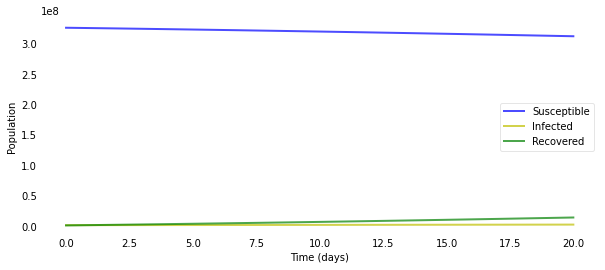

In [15]:
plotsir(t, S2, I2, R2)

##Trial 1
Average household size = 1

In [16]:
N = 328239523 #total population
beta = 1.15/5.2 #Rt of 1.15/5.2 days
D = 5.2 #how long the infection lasts
gamma = 1.0 / D #proportion of infected recovering per day

# initial conditions: S, I, R on 7/1
S0, I0, R0 = 325598897, 2640626, 1282378 

In [17]:
#population density and its log
Density = N / 9147420.0
Log_Density = math.log10(Density)
print("Log of population density: " + str(Log_Density))

#calculation for change in R0
Increase_in_Density = Log_Density - 1.1534917120638863
Changed_R0 = 1.15 + 0.16*Increase_in_Density
print("Changed R0: " + str(Changed_R0))

#conversion of changed R0 to changed beta
Changed_beta = Changed_R0 * gamma
print("Changed beta: " + str(Changed_beta))

#have to run this cell again to put in changed beta
beta = Changed_beta
#beta should equal Changed_beta
print("beta: " + str(beta))

Log of population density: 1.5548922528454303
Changed R0: 1.2142240865250469
Changed beta: 0.23350463202404745
beta: 0.23350463202404745


In [18]:
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

In [19]:
t = np.linspace(0, 20, 21) # Grid of time in days
y0 = S0, I0, R0 # Initial conditions vector

# Integrate the SIR equations over the t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma)) #takes formulas, initial conditions, variables (N, beta, gamma), and calculates S, I, R for 21 days
S, I, R = ret.T 

In [20]:
data = {'Days': t, 'Susceptible': S, 'Infected': I, 'Recovered': R}
df = pd.DataFrame(data)
df.to_csv('trial1.csv')

In [21]:
def plotsir(t, S, I, R):
  f, ax = plt.subplots(1,1,figsize=(10,4))
  ax.plot(t, S, 'b', alpha=0.7, linewidth=2, label='Susceptible')
  ax.plot(t, I, 'y', alpha=0.7, linewidth=2, label='Infected')
  ax.plot(t, R, 'g', alpha=0.7, linewidth=2, label='Recovered')

  ax.set_xlabel('Time (days)')
  ax.set_ylabel('Population')
  ax.yaxis.set_tick_params(length=0)
  ax.xaxis.set_tick_params(length=0)
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')
  legend = ax.legend()
  legend.get_frame().set_alpha(0.5)
  for spine in ('top', 'right', 'bottom', 'left'):
      ax.spines[spine].set_visible(False)
  plt.show();

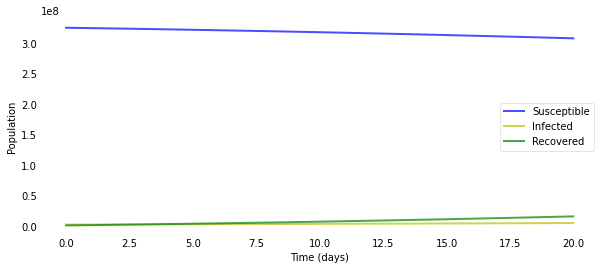

In [22]:
plotsir(t, S, I, R)

##Trial 2
Average household size = 2

In [23]:
S2 = []
I2 = []
R2 = []

N = 328239523/2 #total population
beta = 1.15/5.2 #Rt of 1.15/5.2 days
D = 5.2 #how long the infection lasts 
gamma = 1.0 / D #proportion of infected recovering per day

# initial conditions: S, I, R on 7/1 divided by 2
S0, I0, R0 = 325598897/2, 2640626/2, 1282378/2 

In [24]:
#population density and its log
Density = N / 9147420.0
Log_Density = math.log10(Density)
print("Log of population density: " + str(Log_Density))

#calculation for change in R0
Increase_in_Density = Log_Density - 1.1534917120638863 #1.1534917120638863 is the standard log of density 
Changed_R0 = 1.15 + 0.16*Increase_in_Density
print("Changed R0: " + str(Changed_R0))

#conversion of changed R0 to changed beta
Changed_beta = Changed_R0 * gamma
print("Changed beta: " + str(Changed_beta))

#have to run this cell again to put in changed beta
beta = Changed_beta
#beta should equal Changed_beta
print("beta: " + str(beta))

Log of population density: 1.2538622571814493
Changed R0: 1.16605928721881
Changed beta: 0.2242421706190019
beta: 0.2242421706190019


In [25]:
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

In [26]:
t = np.linspace(0, 20, 21) # Grid of time in days
y0 = S0, I0, R0 # Initial conditions vector

# Integrate the SIR equations over t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma)) #takes formulas, initial conditions, variables (N, beta, gamma), and calculates S, I, R for 21 days
S, I, R = ret.T 

In [27]:
for i in range(len(I)):
  recovered = R[i]*2 #convert households to individuals 
  infected = I[i]*2 #convert households to individuals
  susceptible = S[i]*2 #convert households to individuals
  stillS = (infected-I[i])*0.564 #uninfected people in household with infected member
  totalS = stillS + susceptible #total susceptible including whole + parts of households
  infected2 = (infected-I[i])*0.436 #SAR = 43.6%; infected contacts of reps
  totalI = infected2 + I[i] 

  S2.insert(i, totalS)
  I2.insert(i, totalI)
  R2.insert(i, recovered)

In [28]:
data = {'Days': t, 'Susceptible': S2, 'Infected': I2, 'Recovered': R2}
df = pd.DataFrame(data)
df.to_csv('trial2.csv')

In [29]:
def plotsir(t, S2, I2, R2):
  f, ax = plt.subplots(1,1,figsize=(10,4))
  ax.plot(t, S2, 'b', alpha=0.7, linewidth=2, label='Susceptible')
  ax.plot(t, I2, 'y', alpha=0.7, linewidth=2, label='Infected')
  ax.plot(t, R2, 'g', alpha=0.7, linewidth=2, label='Recovered')

  ax.set_xlabel('Time (days)')
  ax.set_ylabel('Population')
  ax.yaxis.set_tick_params(length=0)
  ax.xaxis.set_tick_params(length=0)
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')
  legend = ax.legend()
  legend.get_frame().set_alpha(0.5)
  for spine in ('top', 'right', 'bottom', 'left'):
      ax.spines[spine].set_visible(False)
  plt.show();

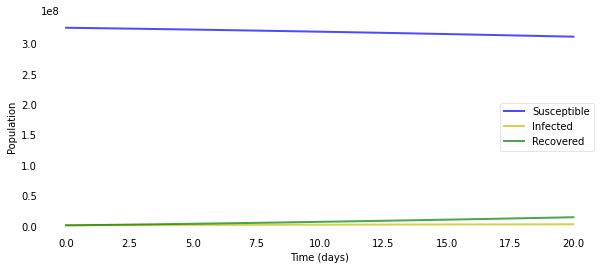

In [30]:
plotsir(t, S2, I2, R2)

##Trial 3 
Average household size = 3

In [31]:
S2 = []
I2 = []
R2 = []
 
N = 328239523/3 #total population
beta = 1.15/5.2 #Rt of 1.15/5.2 days 
D = 5.2 #how long the infection lasts (# days an infectious person has to spread the disease)
gamma = 1.0 / D #proportion of infected recovering per day

# initial conditions: S, I, R on 7/1 divided by 3
S0, I0, R0 = 325598897/3, 2640626/3, 1282378/3  

In [32]:
#population density and its log
Density = N / 9147420.0
Log_Density = math.log10(Density)
print("Log of population density: " + str(Log_Density))

#calculation for change in R0
Increase_in_Density = Log_Density - 1.1534917120638863 #1.1534917120638863 is the standard log of density 
Changed_R0 = 1.15 + 0.16*Increase_in_Density
print("Changed R0: " + str(Changed_R0))

#conversion of changed R0 to changed beta
Changed_beta = Changed_R0 * gamma
print("Changed beta: " + str(Changed_beta))

#have to run this cell again to put in changed beta
beta = Changed_beta
#beta should equal Changed_beta
print("beta: " + str(beta))

Log of population density: 1.077770998125768
Changed R0: 1.137884685769901
Changed beta: 0.21882397803267326
beta: 0.21882397803267326


In [33]:
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

In [34]:
t = np.linspace(0, 20, 21) # Grid of time points (in days)
y0 = S0, I0, R0 # Initial conditions vector

# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma)) #takes formulas, initial conditions, variables (N, beta, gamma), and calculates S, I, R for 21 days
S, I, R = ret.T 

In [35]:
for i in range(len(I)):
  recovered = R[i]*3 #convert households to individuals 
  infected = I[i]*3 #convert households to individuals
  susceptible = S[i]*3 #convert households to individuals
  stillS = (infected-I[i])*0.645 #uninfected people in household with infected member. 1-0.355
  totalS = stillS + susceptible #total susceptible including whole + parts of households
  infected2 = (infected-I[i])*0.355 #SAR = 35.5%; infected contacts of reps
  totalI = infected2 + I[i] 

  S2.insert(i, totalS)
  I2.insert(i, totalI)
  R2.insert(i, recovered)

In [36]:
data = {'Days': t, 'Susceptible': S2, 'Infected': I2, 'Recovered': R2}
df = pd.DataFrame(data)
df.to_csv('trial3.csv')

In [37]:
def plotsir(t, S2, I2, R2):
  f, ax = plt.subplots(1,1,figsize=(10,4))
  ax.plot(t, S2, 'b', alpha=0.7, linewidth=2, label='Susceptible')
  ax.plot(t, I2, 'y', alpha=0.7, linewidth=2, label='Infected')
  ax.plot(t, R2, 'g', alpha=0.7, linewidth=2, label='Recovered')

  ax.set_xlabel('Time (days)')
  ax.set_ylabel('Population')
  ax.yaxis.set_tick_params(length=0)
  ax.xaxis.set_tick_params(length=0)
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')
  legend = ax.legend()
  legend.get_frame().set_alpha(0.5)
  for spine in ('top', 'right', 'bottom', 'left'):
      ax.spines[spine].set_visible(False)
  plt.show();

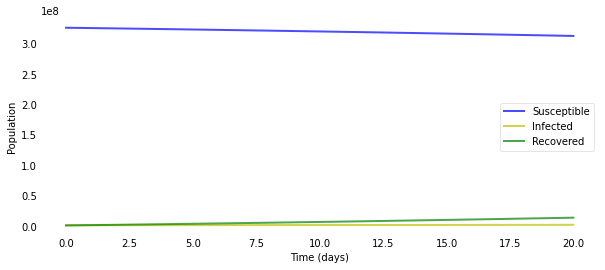

In [38]:
plotsir(t, S2, I2, R2)

##Trial 4
Average household size = 4

In [39]:
S2 = []
I2 = []
R2 = []

N = 328239523/4 #total population
beta = 1.15/5.2 #Rt of 1.15/5.2 days
D = 5.2 #how long the infection lasts (# days an infectious person has to spread the disease)
gamma = 1.0 / D #proportion of infected recovering per day

# initial conditions: S, I, R on 7/1 divided by 4
S0, I0, R0 = 325598897/4, 2640626/4, 1282378/4

In [40]:
#population density and its log
Density = N / 9147420.0
Log_Density = math.log10(Density)
print("Log of population density: " + str(Log_Density))

#calculation for change in R0
Increase_in_Density = Log_Density - 1.1534917120638863 #1.1534917120638863 is the standard log of density 
Changed_R0 = 1.15 + 0.16*Increase_in_Density
print("Changed R0: " + str(Changed_R0))

#conversion of changed R0 to changed beta
Changed_beta = Changed_R0 * gamma
print("Changed beta: " + str(Changed_beta))

#have to run this cell again to put in changed beta
beta = Changed_beta
#beta should equal Changed_beta
print("beta: " + str(beta))

Log of population density: 0.952832261517468
Changed R0: 1.117894487912573
Changed beta: 0.21497970921395632
beta: 0.21497970921395632


In [41]:
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

In [42]:
t = np.linspace(0, 20, 21) # Grid of time points (in days)
y0 = S0, I0, R0 # Initial conditions vector

# Integrate the SIR equations over t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma)) #takes formulas, initial conditions, variables (N, beta, gamma), and calculates S, I, R for 21 days
S, I, R = ret.T 

In [43]:
for i in range(len(I)):
  recovered = R[i]*4 #convert households to individuals 
  infected = I[i]*4 #convert households to individuals
  susceptible = S[i]*4 #convert households to individuals
  stillS = (infected-I[i])*0.796 #uninfected people in household with infected member
  totalS = stillS + susceptible #total susceptible including whole + parts of households
  infected2 = (infected-I[i])*0.204 #SAR = 20.4%; infected contacts of reps
  totalI = infected2 + I[i] 

  S2.insert(i, totalS)
  I2.insert(i, totalI)
  R2.insert(i, recovered)

In [44]:
data = {'Days': t, 'Susceptible': S2, 'Infected': I2, 'Recovered': R2}
df = pd.DataFrame(data)
df.to_csv('trial4.csv')

In [45]:
def plotsir(t, S2, I2, R2):
  f, ax = plt.subplots(1,1,figsize=(10,4))
  ax.plot(t, S2, 'b', alpha=0.7, linewidth=2, label='Susceptible')
  ax.plot(t, I2, 'y', alpha=0.7, linewidth=2, label='Infected')
  ax.plot(t, R2, 'g', alpha=0.7, linewidth=2, label='Recovered')

  ax.set_xlabel('Time (days)')
  ax.set_ylabel('Population')
  ax.yaxis.set_tick_params(length=0)
  ax.xaxis.set_tick_params(length=0)
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')
  legend = ax.legend()
  legend.get_frame().set_alpha(0.5)
  for spine in ('top', 'right', 'bottom', 'left'):
      ax.spines[spine].set_visible(False)
  plt.show();

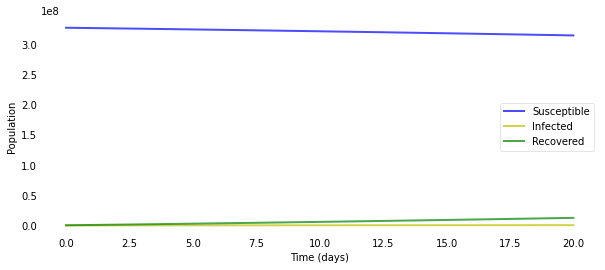

In [46]:
plotsir(t, S2, I2, R2)

##Trial 5
Average household size = 5

In [47]:
S2 = []
I2 = []
R2 = []

N = 328239523/5
beta = 1.15/5.2 #Rt of 1.15/5.2 days
D = 5.2 #how long the infection lasts (# days an infectious person has to spread the disease)
gamma = 1.0 / D #proportion of infected recovering per day

# initial conditions: S, I, R on 7/1 divided by 5
S0, I0, R0 = 325598897/5, 2640626/5, 1282378/5 #232935.999408716  

In [48]:
#population density and its log
Density = N / 9147420.0
Log_Density = math.log10(Density)
print("Log of population density: " + str(Log_Density))

#calculation for change in R0
Increase_in_Density = Log_Density - 1.1534917120638863 #1.1534917120638863 is the standard log of density 
Changed_R0 = 1.15 + 0.16*Increase_in_Density
print("Changed R0: " + str(Changed_R0))

#conversion of changed R0 to changed beta
Changed_beta = Changed_R0 * gamma
print("Changed beta: " + str(Changed_beta))

#have to run this cell again to put in changed beta
beta = Changed_beta
#beta should equal Changed_beta
print("beta: " + str(beta))

Log of population density: 0.8559222485094116
Changed R0: 1.102388885831284
Changed beta: 0.21199786265986229
beta: 0.21199786265986229


In [49]:
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

In [50]:
t = np.linspace(0, 20, 21) # Grid of time in days
y0 = S0, I0, R0 # Initial conditions vector

# Integrate the SIR equations over t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma)) #takes formulas, initial conditions, variables (N, beta, gamma), and calculates S, I, R for 21 days
S, I, R = ret.T 

In [51]:
for i in range(len(I)):
  recovered = R[i]*5 #convert households to individuals 
  infected = I[i]*5 #convert households to individuals
  susceptible = S[i]*5 #convert households to individuals
  stillS = (infected-I[i])*0.796 #uninfected people in household with infected member
  totalS = stillS + susceptible #total susceptible including whole + parts of households
  infected2 = (infected-I[i])*0.204 #SAR = 20.4%; infected contacts of reps
  totalI = infected2 + I[i] 

  S2.insert(i, totalS)
  I2.insert(i, totalI)
  R2.insert(i, recovered)

In [52]:
data = {'Days': t, 'Susceptible': S2, 'Infected': I2, 'Recovered': R2}
df = pd.DataFrame(data)
df.to_csv('trial5.csv')

In [53]:
def plotsir(t, S2, I2, R2):
  f, ax = plt.subplots(1,1,figsize=(10,4))
  ax.plot(t, S2, 'b', alpha=0.7, linewidth=2, label='Susceptible')
  ax.plot(t, I2, 'y', alpha=0.7, linewidth=2, label='Infected')
  ax.plot(t, R2, 'g', alpha=0.7, linewidth=2, label='Recovered')

  ax.set_xlabel('Time (days)')
  ax.set_ylabel('Population')
  ax.yaxis.set_tick_params(length=0)
  ax.xaxis.set_tick_params(length=0)
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')
  legend = ax.legend()
  legend.get_frame().set_alpha(0.5)
  for spine in ('top', 'right', 'bottom', 'left'):
      ax.spines[spine].set_visible(False)
  plt.show();

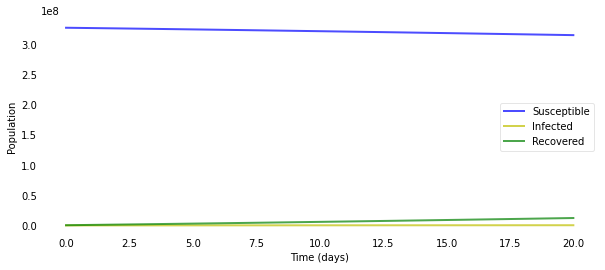

In [54]:
plotsir(t, S2, I2, R2)

##Trial 6
Average household size = 6

In [55]:
S2 = []
I2 = []
R2 = []

N = 328239523/6 #total population
beta = 1.15/5.2 #Rt of 1.15/5.2 days
D = 5.2 #how long the infection lasts (# days an infectious person has to spread the disease)
gamma = 1.0 / D #proportion of infected recovering per day

# initial conditions: S, I, R on 7/1 divided by 6
S0, I0, R0 = 325598897/6, 2640626/6, 1282378/6 #194113.332840596  

In [56]:
#population density and its log
Density = N / 9147420.0
Log_Density = math.log10(Density)
print("Log of population density: " + str(Log_Density))
#1.1534917120638863 is the standard log of density 


#calculation for change in R0
Increase_in_Density = Log_Density - 1.1534917120638863
Changed_R0 = 1.15 + 0.16*Increase_in_Density
print("Changed R0: " + str(Changed_R0))

#conversion of changed R0 to changed beta
Changed_beta = Changed_R0 * gamma
print("Changed beta: " + str(Changed_beta))

#have to run this cell again to put in changed beta
beta = Changed_beta
#beta should equal Changed_beta
print("beta: " + str(beta))

Log of population density: 0.7767410024617867
Changed R0: 1.089719886463664
Changed beta: 0.20956151662762765
beta: 0.20956151662762765


In [57]:
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

In [58]:
t = np.linspace(0, 20, 21) # Grid of time in days
y0 = S0, I0, R0 # Initial conditions vector

# Integrate the SIR equations over t
ret = odeint(deriv, y0, t, args=(N, beta, gamma)) #takes formulas, initial conditions, variables (N, beta, gamma), and calculates S, I, R for 21 days
S, I, R = ret.T 

In [59]:
for i in range(len(I)):
  recovered = R[i]*6 #convert households to individuals 
  infected = I[i]*6 #convert households to individuals
  susceptible = S[i]*6 #convert households to individuals
  stillS = (infected-I[i])*0.796 #uninfected people in household with infected member
  totalS = stillS + susceptible #total susceptible including whole + parts of households
  infected2 = (infected-I[i])*0.204 #SAR = 20.4%; infected contacts of reps
  totalI = infected2 + I[i] 

  S2.insert(i, totalS)
  I2.insert(i, totalI)
  R2.insert(i, recovered)

In [60]:
data = {'Days': t, 'Susceptible': S2, 'Infected': I2, 'Recovered': R2}
df = pd.DataFrame(data)
df.to_csv('trial6.csv')

In [61]:
def plotsir(t, S2, I2, R2):
  f, ax = plt.subplots(1,1,figsize=(10,4))
  ax.plot(t, S2, 'b', alpha=0.7, linewidth=2, label='Susceptible')
  ax.plot(t, I2, 'y', alpha=0.7, linewidth=2, label='Infected')
  ax.plot(t, R2, 'g', alpha=0.7, linewidth=2, label='Recovered')

  ax.set_xlabel('Time (days)')
  ax.set_ylabel('Population')
  ax.yaxis.set_tick_params(length=0)
  ax.xaxis.set_tick_params(length=0)
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')
  legend = ax.legend()
  legend.get_frame().set_alpha(0.5)
  for spine in ('top', 'right', 'bottom', 'left'):
      ax.spines[spine].set_visible(False)
  plt.show();

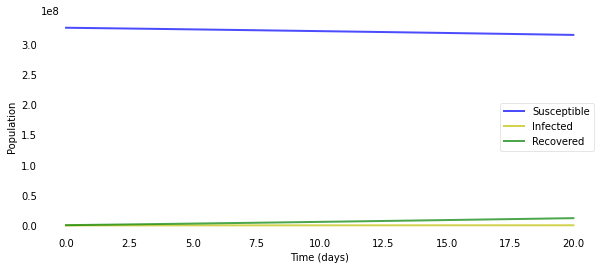

In [62]:
plotsir(t, S2, I2, R2)

##Trial 7
Average household size = 7

In [63]:
S2 = []
I2 = []
R2 = []

N = 328239523/7
beta = 1.15/5.2 #Rt of 1.15/5.2 days
D = 5.2 #how long the infection lasts (# days an infectious person has to spread the disease)
gamma = 1.0 / D #proportion of infected recovering per day

S0, I0, R0 = 325598897/7, 2640626/7, 1282378/7  # initial conditions: S, I, R on 7/1 divided by 7

In [64]:
#population density and its log
Density = N / 9147420.0
Log_Density = math.log10(Density)
print("Log of population density: " + str(Log_Density))
#1.1534917120638863 is the standard log of density 

#calculation for change in R0
Increase_in_Density = Log_Density - 1.1534917120638863
Changed_R0 = 1.15 + 0.16*Increase_in_Density
print("Changed R0: " + str(Changed_R0))

#conversion of changed R0 to changed beta
Changed_beta = Changed_R0 * gamma
print("Changed beta: " + str(Changed_beta))

#have to run this cell again to put in changed beta
beta = Changed_beta
#beta should equal Changed_beta
print("beta: " + str(beta))

Log of population density: 0.7097942128311735
Changed R0: 1.0790084001227658
Changed beta: 0.20750161540822418
beta: 0.20750161540822418


In [65]:
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

In [66]:
t = np.linspace(0, 20, 21) # Grid of time in days
y0 = S0, I0, R0 # Initial conditions vector

# Integrate the SIR equations over t
ret = odeint(deriv, y0, t, args=(N, beta, gamma)) #takes formulas, initial conditions, variables (N, beta, gamma), and calculates S, I, R for 21 days
S, I, R = ret.T

In [67]:
for i in range(len(I)):
  recovered = R[i]*7 #convert households to individuals 
  infected = I[i]*7 #convert households to individuals
  susceptible = S[i]*7 #convert households to individuals
  stillS = (infected-I[i])*0.909 #uninfected people in household with infected member
  totalS = stillS + susceptible #total susceptible including whole + parts of households
  infected2 = (infected-I[i])*0.091 #SAR = 9.1%; infected contacts of reps
  totalI = infected2 + I[i] 

  S2.insert(i, totalS)
  I2.insert(i, totalI)
  R2.insert(i, recovered)

In [68]:
data = {'Days': t, 'Susceptible': S2, 'Infected': I2, 'Recovered': R2}
df = pd.DataFrame(data)
df.to_csv('trial7.csv')

In [69]:
def plotsir(t, S, I, R):
  f, ax = plt.subplots(1,1,figsize=(10,4))
  ax.plot(t, S, 'b', alpha=0.7, linewidth=2, label='Susceptible')
  ax.plot(t, I, 'y', alpha=0.7, linewidth=2, label='Infected')
  ax.plot(t, R, 'g', alpha=0.7, linewidth=2, label='Recovered')

  ax.set_xlabel('Time (days)')
  ax.set_ylabel('Population')
  ax.yaxis.set_tick_params(length=0)
  ax.xaxis.set_tick_params(length=0)
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')
  legend = ax.legend()
  legend.get_frame().set_alpha(0.5)
  for spine in ('top', 'right', 'bottom', 'left'):
      ax.spines[spine].set_visible(False)
  plt.show();

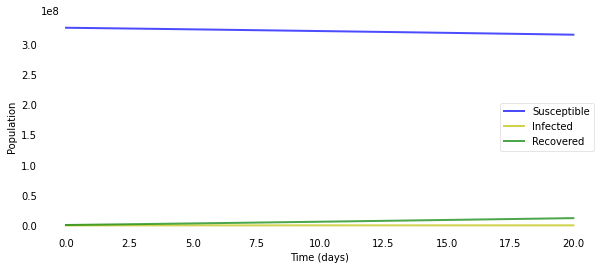

In [70]:
plotsir(t, S2, I2, R2)
#Why are these #s less than the #s of a household size of 2.5?

##Results



Below are the results of the graphs

 The X axis is days from July 1st and the Y axis is number of individuals. Each line is the number of individuals either infected, recovered, or susceptible.

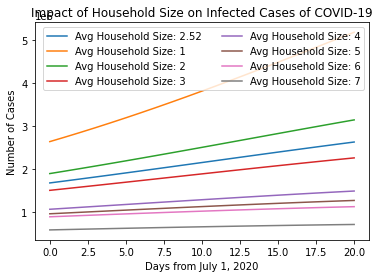

In [71]:
control = pd.read_csv('/content/controlTrial.csv')
trial1 = pd.read_csv('/content/trial1.csv')
trial2 = pd.read_csv('/content/trial2.csv')
trial3 = pd.read_csv('/content/trial3.csv')
trial4 = pd.read_csv('/content/trial4.csv')
trial5 = pd.read_csv('/content/trial5.csv')
trial6 = pd.read_csv('/content/trial6.csv')
trial7 = pd.read_csv('/content/trial7.csv')

x = control.Days

y0 = control.Infected
y1 = trial1.Infected
y2 = trial2.Infected
y3 = trial3.Infected
y4 = trial4.Infected
y5 = trial5.Infected
y6 = trial6.Infected
y7 = trial7.Infected

plt.plot(x, y0, label="Avg Household Size: 2.52")
plt.plot(x, y1, label="Avg Household Size: 1")
plt.plot(x, y2, label="Avg Household Size: 2")
plt.plot(x, y3, label="Avg Household Size: 3")
plt.plot(x, y4, label="Avg Household Size: 4")
plt.plot(x, y5, label="Avg Household Size: 5")
plt.plot(x, y6, label="Avg Household Size: 6")
plt.plot(x, y7, label="Avg Household Size: 7")

plt.xlabel("Days from July 1, 2020")
plt.ylabel("Number of Cases")
plt.title("Impact of Household Size on Infected Cases of COVID-19")

plt.legend(loc = 'upper right', bbox_to_anchor=(1, 1), ncol= 2)

plt.savefig('infected.png', dpi = 300)
plt.show()

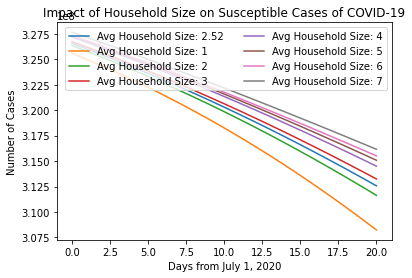

In [72]:
y0 = control.Susceptible
y1 = trial1.Susceptible
y2 = trial2.Susceptible
y3 = trial3.Susceptible
y4 = trial4.Susceptible
y5 = trial5.Susceptible
y6 = trial6.Susceptible
y7 = trial7.Susceptible

plt.plot(x, y0, label="Avg Household Size: 2.52")
plt.plot(x, y1, label="Avg Household Size: 1")
plt.plot(x, y2, label="Avg Household Size: 2")
plt.plot(x, y3, label="Avg Household Size: 3")
plt.plot(x, y4, label="Avg Household Size: 4")
plt.plot(x, y5, label="Avg Household Size: 5")
plt.plot(x, y6, label="Avg Household Size: 6")
plt.plot(x, y7, label="Avg Household Size: 7")

plt.xlabel("Days from July 1, 2020")
plt.ylabel("Number of Cases")
plt.title("Impact of Household Size on Susceptible Cases of COVID-19")

plt.legend(loc = 'upper right', bbox_to_anchor=(1, 1), ncol= 2)

plt.savefig('susceptible.png', dpi = 300)
plt.show()

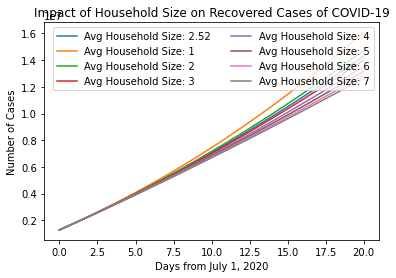

In [73]:
y0 = control.Recovered
y1 = trial1.Recovered
y2 = trial2.Recovered
y3 = trial3.Recovered
y4 = trial4.Recovered
y5 = trial5.Recovered
y6 = trial6.Recovered
y7 = trial7.Recovered

plt.plot(x, y0, label="Avg Household Size: 2.52")
plt.plot(x, y1, label="Avg Household Size: 1")
plt.plot(x, y2, label="Avg Household Size: 2")
plt.plot(x, y3, label="Avg Household Size: 3")
plt.plot(x, y4, label="Avg Household Size: 4")
plt.plot(x, y5, label="Avg Household Size: 5")
plt.plot(x, y6, label="Avg Household Size: 6")
plt.plot(x, y7, label="Avg Household Size: 7")

plt.xlabel("Days from July 1, 2020")
plt.ylabel("Number of Cases")
plt.title("Impact of Household Size on Recovered Cases of COVID-19")

plt.legend(loc = 'upper right', bbox_to_anchor=(1, 1), ncol= 2)

plt.savefig('recovered.png', dpi = 300)
plt.show()